In [499]:
#importing the libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# The goal of this project is to predict whether a person makes over 50K a year or not given their demographic variation.

In [500]:
df = pd.read_csv('adult.csv')
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [501]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education.num      int64
marital.status    object
occupation        object
relationship      object
race              object
sex               object
capital.gain       int64
capital.loss       int64
hours.per.week     int64
native.country    object
income            object
dtype: object

In [502]:
df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [503]:
df.shape

(32561, 15)

In [504]:
df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [505]:
df[df=='?']=np.nan

In [506]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [507]:
df.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

In [508]:
null_columns =['workclass','occupation','native.country']
for i in null_columns:
    df.fillna(df[i].mode()[0], inplace=True)
    
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,Private,77053,HS-grad,9,Widowed,Private,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,Private,186061,Some-college,10,Widowed,Private,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [509]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [510]:
corr=df.corr()

<AxesSubplot:>

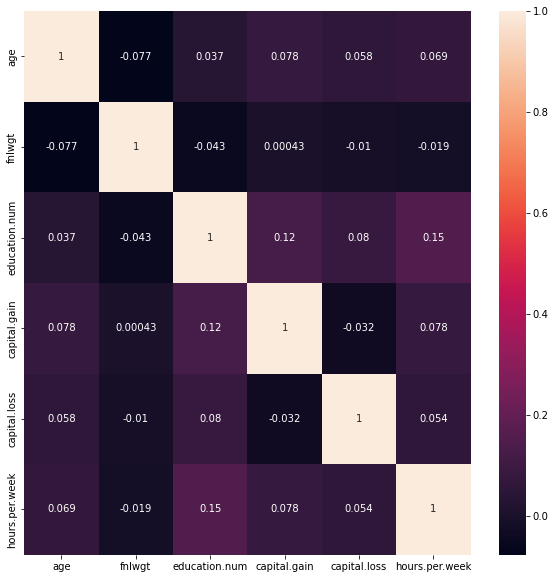

In [511]:
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True)

<AxesSubplot:xlabel='count', ylabel='workclass'>

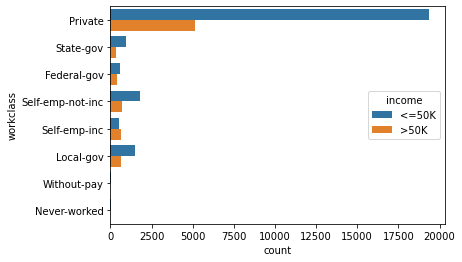

In [512]:
#workclass
sns.countplot(y=df['workclass'], hue=df['income'])

In [513]:
#most people with income over >50k are working in the private sector

<Figure size 360x360 with 0 Axes>

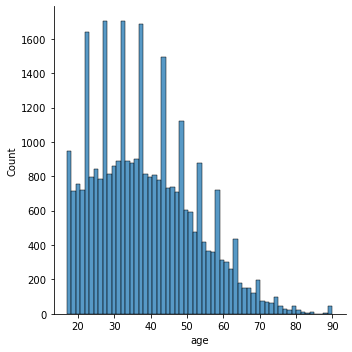

In [514]:
#age
plt.figure(figsize=(5,5))
sns.displot(df['age'],kde=False)
plt.show()

In [515]:
(df.age>70).sum()  

540

In [516]:
#data is right skewed w.r.t age but since datapoints > 70 corresponds to a mere 1.2%, it is not an issue

<Figure size 360x360 with 0 Axes>

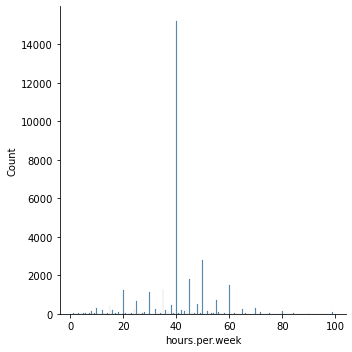

In [517]:
#HoursPerWeek
plt.figure(figsize=(5,5))
sns.displot(df['hours.per.week'],kde=False)
plt.show()

In [518]:
#majority population spend between 40-50 hr/wk

<AxesSubplot:xlabel='count', ylabel='education'>

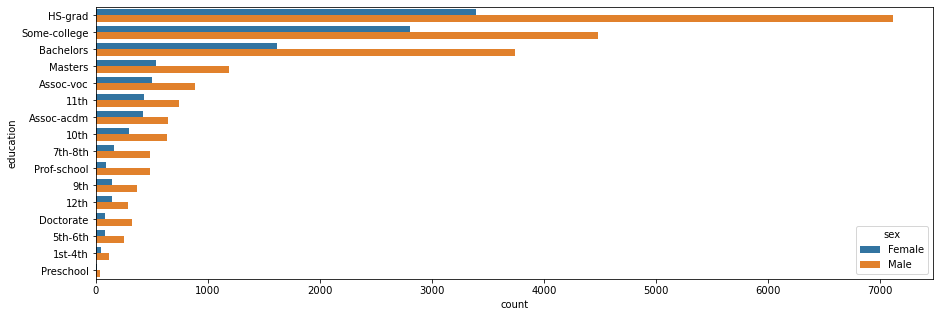

In [519]:
#Education
fig = plt.figure(figsize=(15,5))
sns.countplot(y=df['education'], hue=df['sex'], order = df['education'].value_counts().index)

In [520]:
#most people are HS-grad (32%) followed by college goers (22%) and Bachelors (17%)

<AxesSubplot:xlabel='count', ylabel='marital.status'>

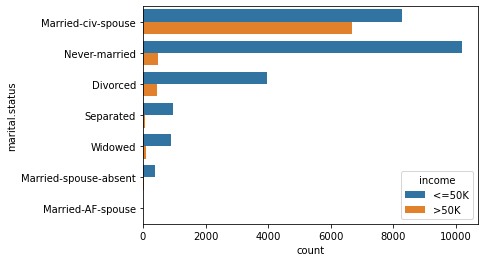

In [521]:
#Marital Status
sns.countplot(y=df['marital.status'], hue=df['income'], order = df['marital.status'].value_counts().index)

In [522]:
#most people are married with a civilian spouse followed by people who are never married

<AxesSubplot:xlabel='count', ylabel='occupation'>

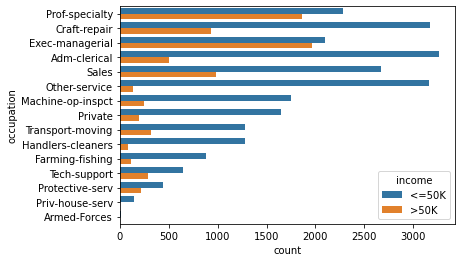

In [523]:
#Occupation
sns.countplot(y=df['occupation'], hue=df['income'], order = df['occupation'].value_counts().index)

In [524]:
#Prof-specialty and Craft-repair have the maximum count of samples but Exec-managerial, Adm-clerical and Sales have comparable number of observations.
#Armed-Forces has minimum samples in the occupation attribute of this database.

<AxesSubplot:xlabel='sex', ylabel='count'>

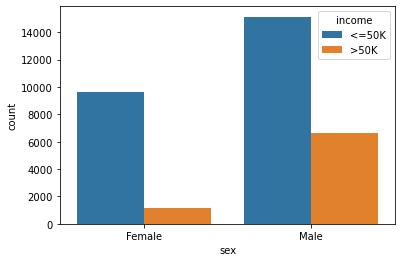

In [525]:
#Gender
sns.countplot(data = df, x = df['sex'], hue=df['income'])

In [526]:
#Majority men earn more than >50k

<AxesSubplot:xlabel='race', ylabel='count'>

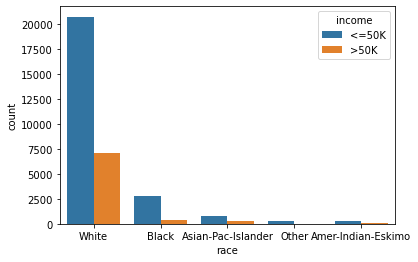

In [527]:
#Race
sns.countplot(x=df['race'], hue=df['income'])

In [528]:
#Whites have the majority income over >50k

<AxesSubplot:xlabel='count', ylabel='relationship'>

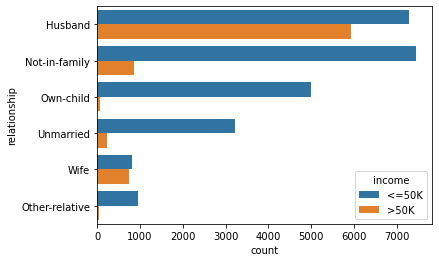

In [529]:
#Relationship
sns.countplot(y=df['relationship'], hue=df['income'], order = df['relationship'].value_counts().index)

In [530]:
#Husbands earn more than 50k compared to other relationship categories

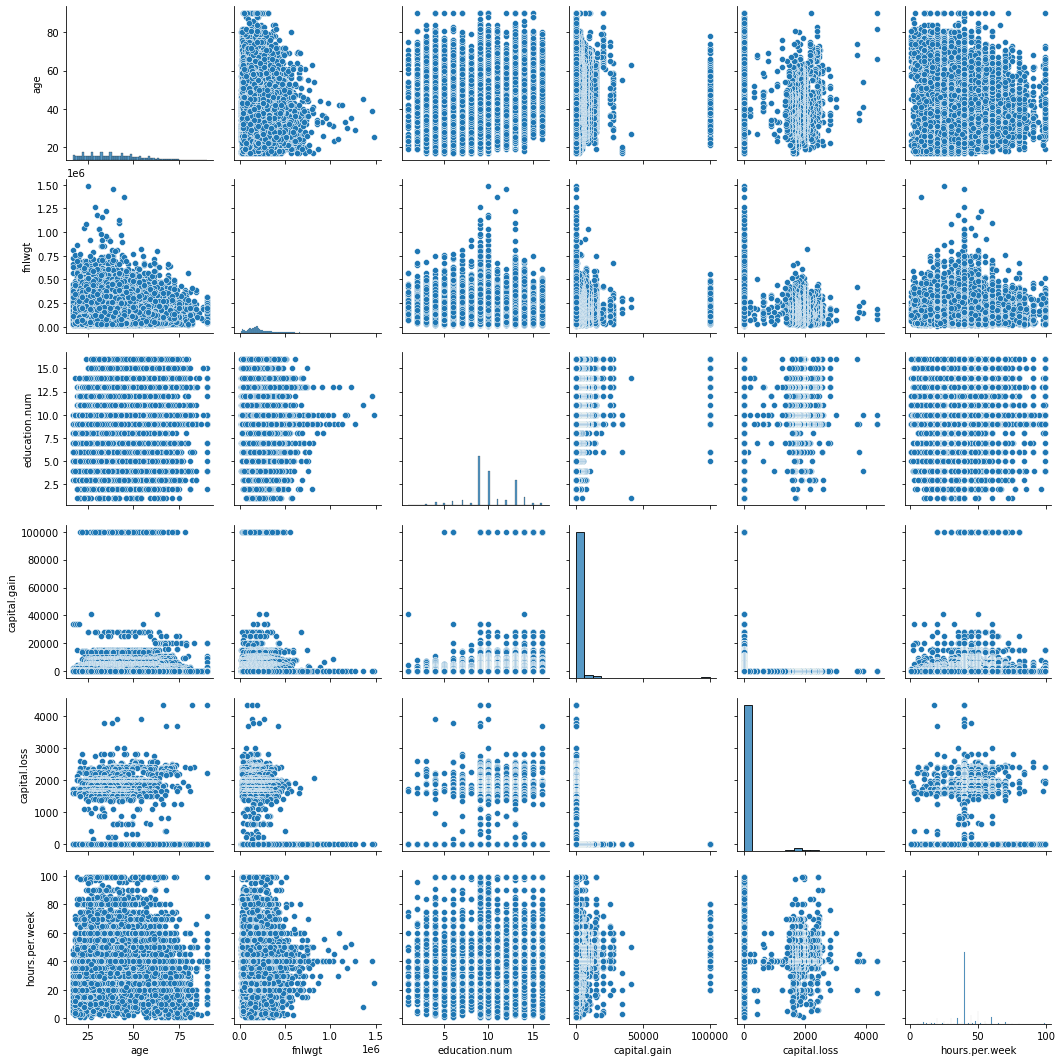

In [531]:
sns.pairplot(df)

In [532]:
#Checking Unique Values
df["workclass"].unique()

array(['Private', 'State-gov', 'Federal-gov', 'Self-emp-not-inc',
       'Self-emp-inc', 'Local-gov', 'Without-pay', 'Never-worked'],
      dtype=object)

In [533]:
df["education"].unique()

array(['HS-grad', 'Some-college', '7th-8th', '10th', 'Doctorate',
       'Prof-school', 'Bachelors', 'Masters', '11th', 'Assoc-acdm',
       'Assoc-voc', '1st-4th', '5th-6th', '12th', '9th', 'Preschool'],
      dtype=object)

In [534]:
df["marital.status"].unique()

array(['Widowed', 'Divorced', 'Separated', 'Never-married',
       'Married-civ-spouse', 'Married-spouse-absent', 'Married-AF-spouse'],
      dtype=object)

In [535]:
df["occupation"].unique()

array(['Private', 'Exec-managerial', 'Machine-op-inspct',
       'Prof-specialty', 'Other-service', 'Adm-clerical', 'Craft-repair',
       'Transport-moving', 'Handlers-cleaners', 'Sales',
       'Farming-fishing', 'Tech-support', 'Protective-serv',
       'Armed-Forces', 'Priv-house-serv'], dtype=object)

In [536]:
df["relationship"].unique()

array(['Not-in-family', 'Unmarried', 'Own-child', 'Other-relative',
       'Husband', 'Wife'], dtype=object)

In [537]:
df["race"].unique()

array(['White', 'Black', 'Asian-Pac-Islander', 'Other',
       'Amer-Indian-Eskimo'], dtype=object)

In [538]:
df["sex"].unique()

array(['Female', 'Male'], dtype=object)

In [539]:
df["native.country"].unique()

array(['United-States', 'Private', 'Mexico', 'Greece', 'Vietnam', 'China',
       'Taiwan', 'India', 'Philippines', 'Trinadad&Tobago', 'Canada',
       'South', 'Holand-Netherlands', 'Puerto-Rico', 'Poland', 'Iran',
       'England', 'Germany', 'Italy', 'Japan', 'Hong', 'Honduras', 'Cuba',
       'Ireland', 'Cambodia', 'Peru', 'Nicaragua', 'Dominican-Republic',
       'Haiti', 'El-Salvador', 'Hungary', 'Columbia', 'Guatemala',
       'Jamaica', 'Ecuador', 'France', 'Yugoslavia', 'Scotland',
       'Portugal', 'Laos', 'Thailand', 'Outlying-US(Guam-USVI-etc)'],
      dtype=object)

In [540]:
native=df["native.country"].value_counts().to_dict()

In [541]:
df["native.country"]=df["native.country"].map(native)

In [542]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,Private,77053,HS-grad,9,Widowed,Private,Not-in-family,White,Female,0,4356,40,29170,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,29170,<=50K
2,66,Private,186061,Some-college,10,Widowed,Private,Unmarried,Black,Female,0,4356,40,29170,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,29170,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,29170,<=50K


In [543]:
#ENCODING CATEGORICAL VALUES

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [544]:
df_cols=("workclass","education","marital.status","occupation","relationship","race","sex")
for i in df_cols:
    df[i]=le.fit_transform(df[i])

In [545]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,3,77053,11,9,6,9,1,4,0,0,4356,40,29170,<=50K
1,82,3,132870,11,9,6,3,1,4,0,0,4356,18,29170,<=50K
2,66,3,186061,15,10,6,9,4,2,0,0,4356,40,29170,<=50K
3,54,3,140359,5,4,0,6,4,4,0,0,3900,40,29170,<=50K
4,41,3,264663,15,10,5,10,3,4,0,0,3900,40,29170,<=50K


In [546]:
#Splitting dataset into dependent and independent variables

X=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

In [547]:
#SPLITTING DATASET INTO TRAINING AND TEST SET

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size= 0.2,random_state=0)

In [548]:
#TRAINING THE DATASET ON LOGISTIC REGRESSION MODEL

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = None,solver='liblinear', max_iter=100)
scaler = preprocessing.StandardScaler().fit(X_train)
scaler
StandardScaler()
X_scaled = scaler.transform(X_train)
X_scaled
classifier.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [549]:
#PREDICTING THE RESULT

y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[['<=50K' '<=50K']
 ['<=50K' '<=50K']
 ['<=50K' '<=50K']
 ...
 ['>50K' '<=50K']
 ['<=50K' '<=50K']
 ['<=50K' '<=50K']]


In [550]:
#MAKING CONFUSION MATRIX AND CHECKING THE ACCURACY

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[4813  153]
 [1117  430]]


0.8050053738676494

In [551]:
#As we got a moderate accuracy so will try any other model to see if accuracy can increase

In [552]:
#TRAINING THE DATASET ON RANDOM FOREST CLASSIFIER

from sklearn.ensemble import RandomForestClassifier
classifier_2 = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)
classifier_2.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', random_state=0)

In [553]:
#PREDICTING THE VALUES

y_pred_2 = classifier_2.predict(X_test)
print(np.concatenate((y_pred_2.reshape(len(y_pred_2),1), y_test.reshape(len(y_test),1)),1))

[['<=50K' '<=50K']
 ['<=50K' '<=50K']
 ['<=50K' '<=50K']
 ...
 ['<=50K' '<=50K']
 ['<=50K' '<=50K']
 ['<=50K' '<=50K']]


In [554]:
#MAKING THE CONFUSION MATRIX AND CHECKING THE ACCURACY

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred_2)
print(cm)
accuracy_score(y_test, y_pred_2)

[[4661  305]
 [ 614  933]]


0.8588975894365116

Got a higher accuracy using Random forest than Logistic Regression.

# FINAL CONCLUSIONS/ MAJOR FINDINGS:

1. Nearly 75% of the data recorded in this database earns <=50k.
2. Average age of people earning >50k is around 52.
3. Higher education is directly correlated with a better chance of earning >50k.
4. Females are more likely to be earning <= 50k (nearly 89% of the females recorded earn <=50k).
5. Average working hour of females is less when compared to males.
6. Random Forest is the best model to predict adult income with an accuracry rate of above 85%.